# Lunch Network

### data2Graph

In [13]:
import networkx as nx
import matplotlib.pyplot as plt 
#%matplotlib inline  
nx.__version__

'2.2'

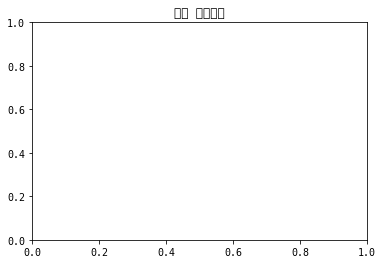

In [14]:
G = nx.Graph()
plt.rc('font', family='monospace')
plt.title('런치 네트워크')

In [15]:
nodes_=#data goes here
len(nodes_)

32

In [16]:
nodes2 = #data goes here
len(nodes2)

32

In [17]:
data_num = len(nodes2)

indeg = [i*0 for i in range(0,202)]
nodes = nodes_
edges = []
for i in range(0,data_num):
    friends = len(nodes2[i])
    for j in range(0,friends):
        t = (nodes_[i],nodes2[i][j])
        try:
            nodes.index(nodes2[i][j])
        except:
            nodes.append(nodes2[i][j])
        edges.append(t)
print("nodes : ",len(nodes),"\nedges : ",len(edges))


nodes :  197 
edges :  278


In [18]:
#add nodes
G.add_nodes_from(nodes)

#add edges
G.add_edges_from(edges)

### Graph Coloring, Drawing

In [19]:
#node coloring by univ
import pandas as pd

univs = []
for i in nodes:
    univ = i[i.index('(')+1:i.index(',')]
    univs.append(univ)

carac = pd.DataFrame({ 'ID':nodes, 'myvalue':univs })
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
carac['myvalue']=pd.Categorical(carac['myvalue'])

In [20]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 197
Number of edges: 262
Average degree:   2.6599


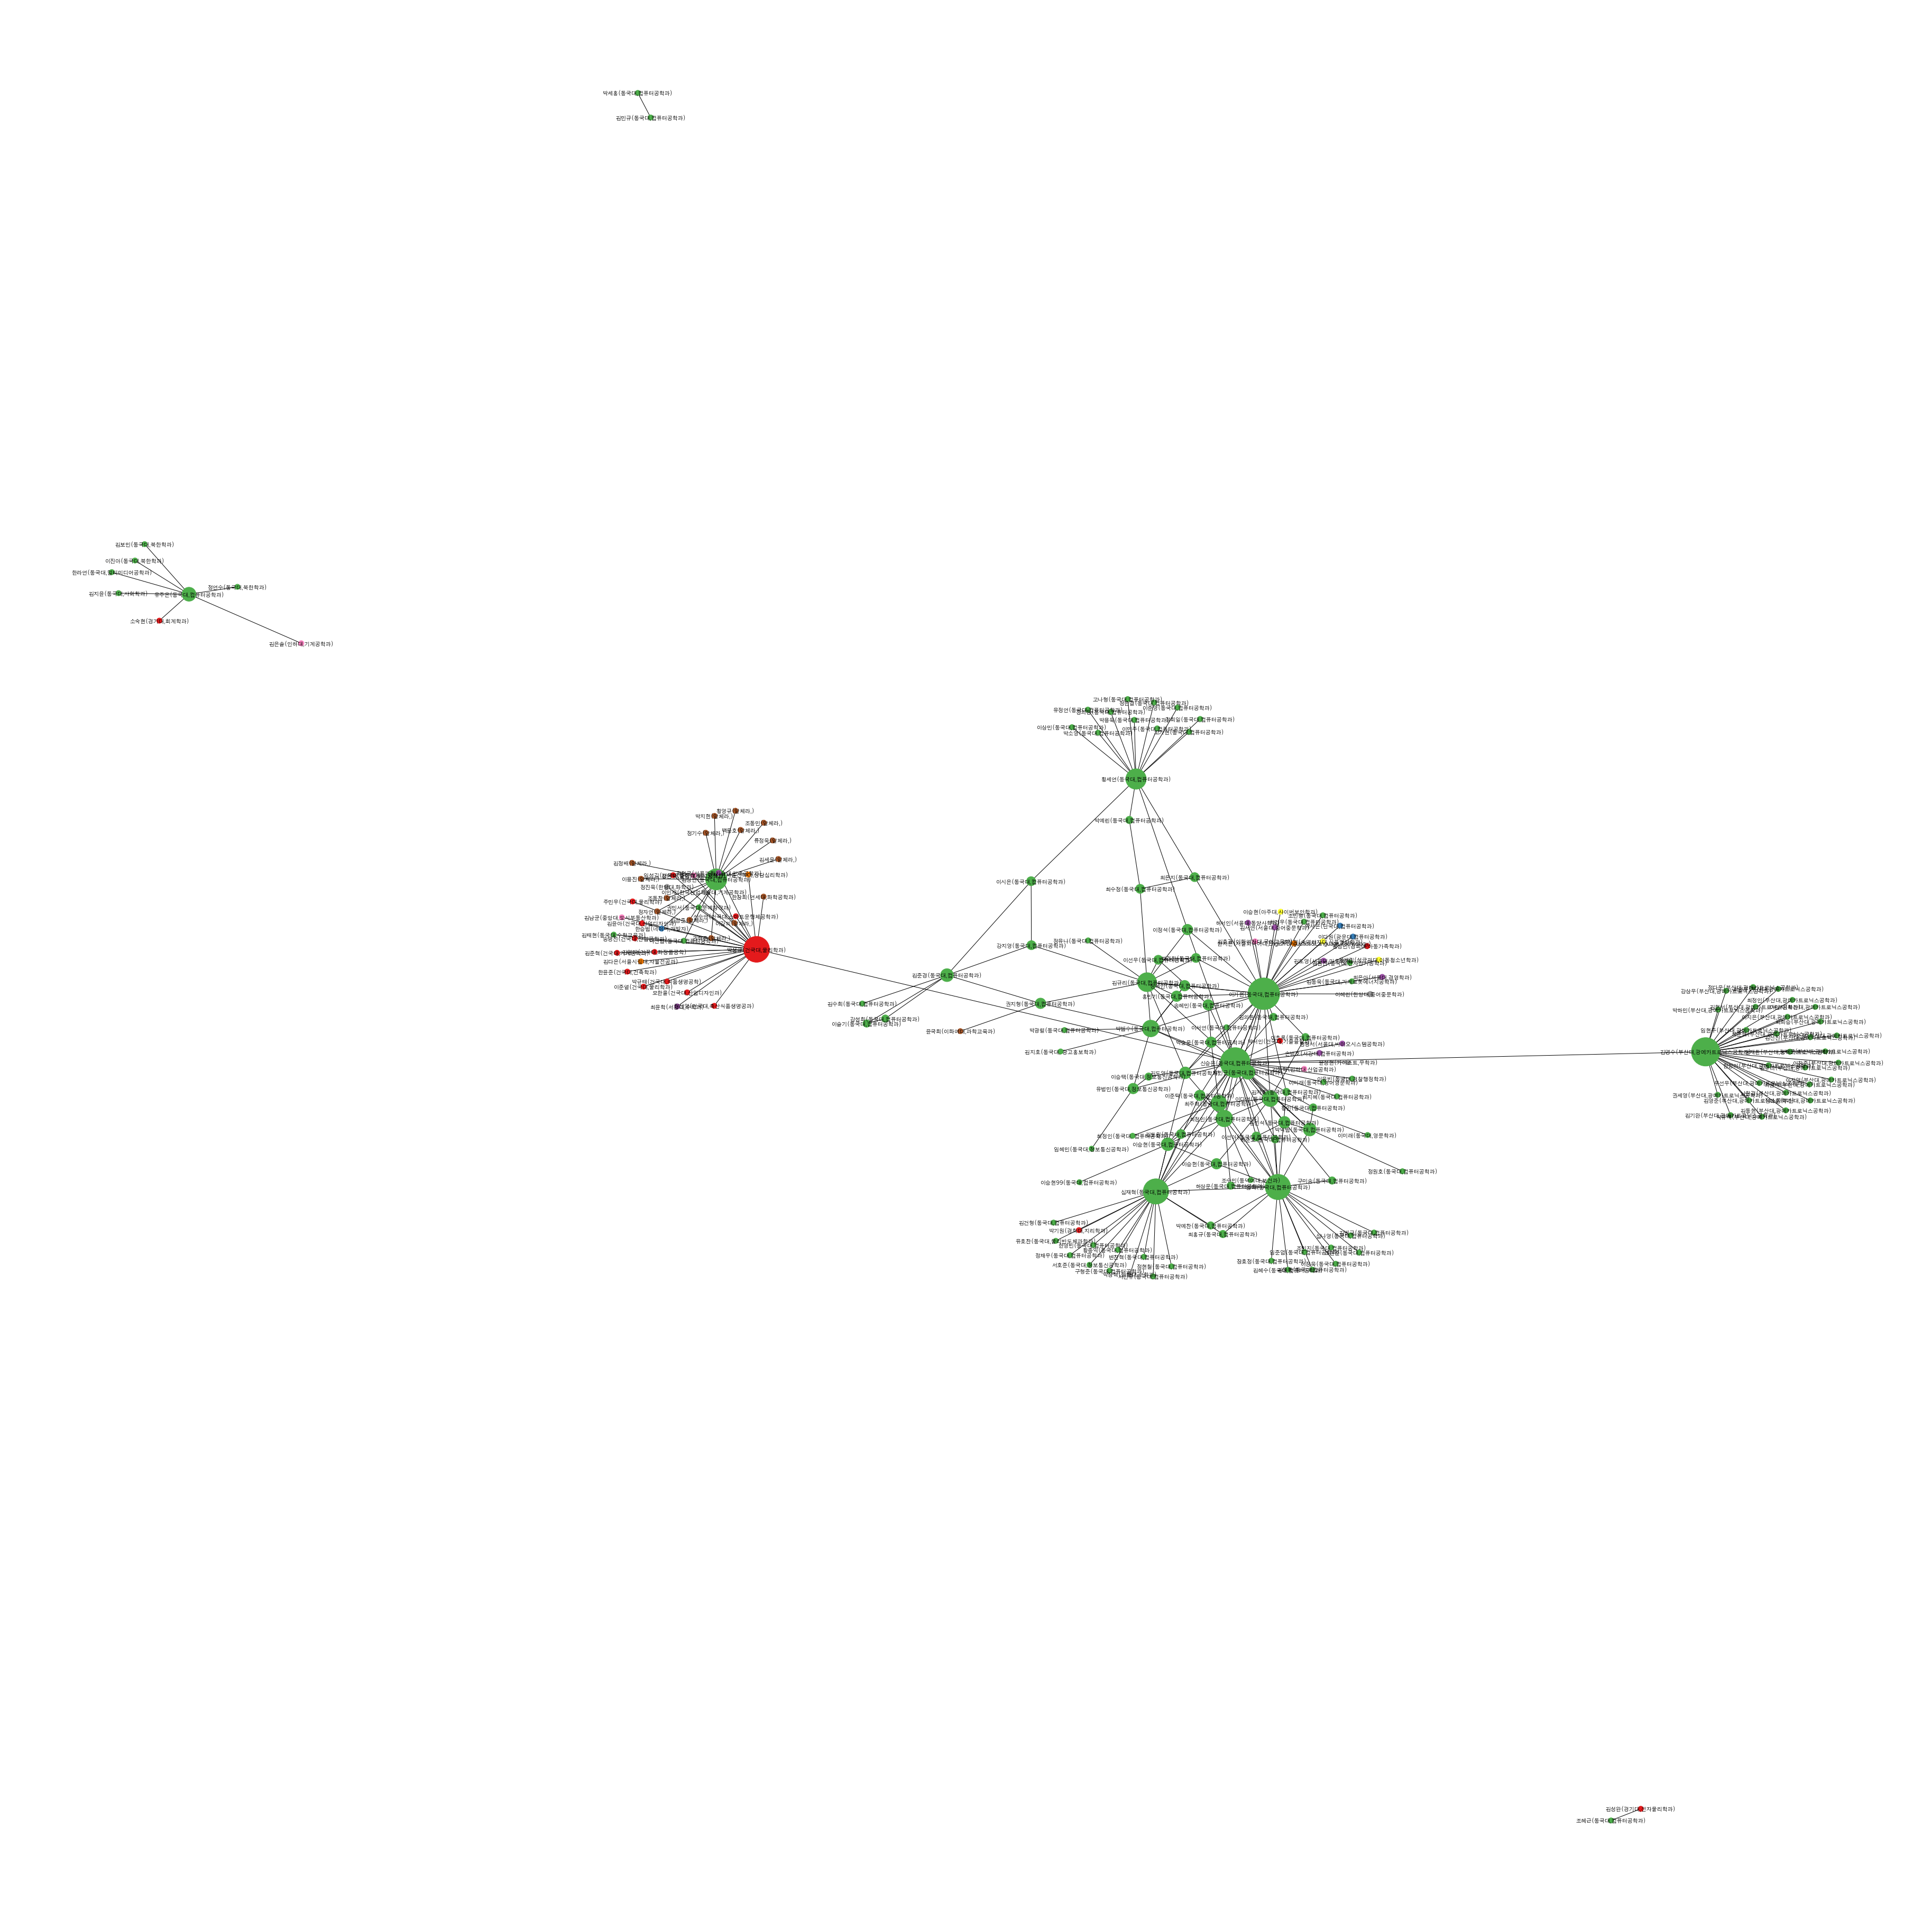

In [23]:
spring_pos = nx.spring_layout(G)

d = nx.degree(G)
plt.figure(figsize = (50,50))
nx.draw(G,
        pos = spring_pos,
        node_color=carac['myvalue'].cat.codes,cmap=plt.cm.Set1, 
        node_size=[v[1]*100 for v in d],
        font_family='AppleGothic', font_size=10,with_labels = True
        )

In [24]:
#save file
plt.savefig("Graph.png", format="PNG")

### Indegree of Lunch network 

In [31]:
d = list(d)
hist = []
for i in d:
    hist.append(i[1])

(array([ 177.,    7.,    4.,    1.,    2.,    0.,    3.,    0.,    2.,    1.]),
 array([  1. ,   4.5,   8. ,  11.5,  15. ,  18.5,  22. ,  25.5,  29. ,
         32.5,  36. ]),
 <a list of 10 Patch objects>)

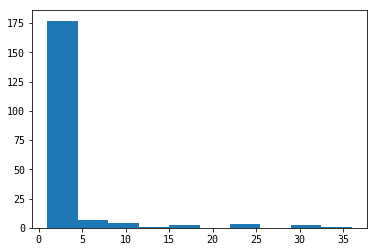

In [32]:
plt.hist(hist)